In [1]:
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'  # 或者 'Microsoft YaHei'、'Arial Unicode MS'
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号


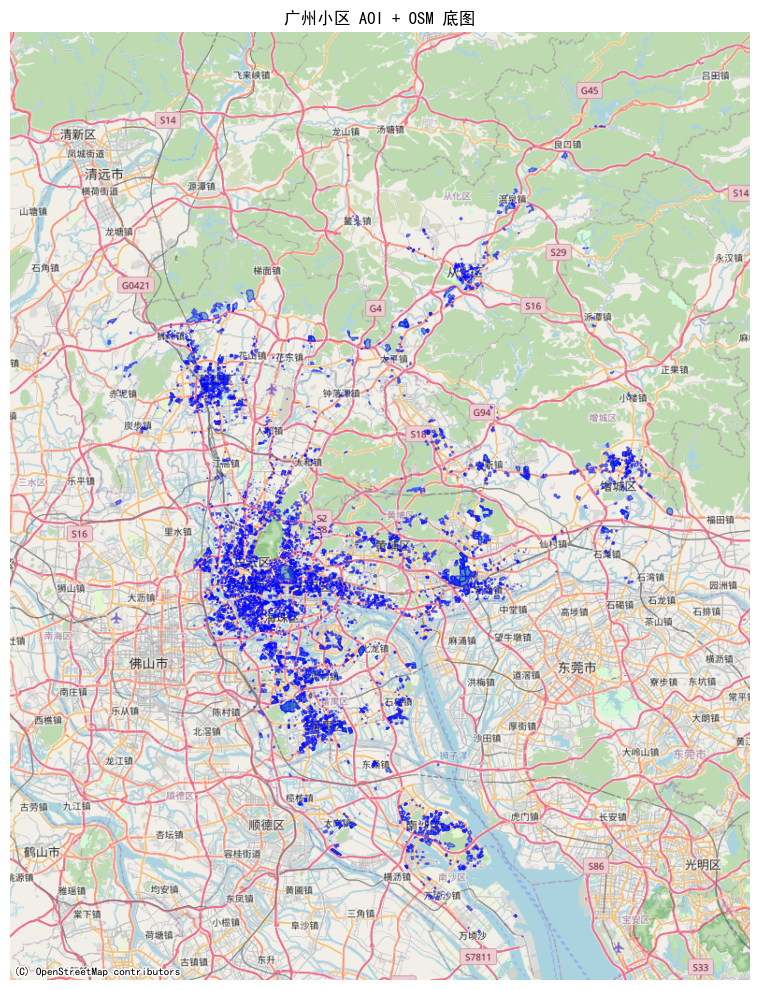

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# 1. 读取并转坐标
aoi_path = "广州市小区AOI/广州市小区AOI.shp"
aoi_gdf = gpd.read_file(aoi_path).to_crs(epsg=4326)

# 2. 清洗极端值
aoi_gdf = aoi_gdf.cx[110:114, 22:24]

# 3. 投影为 EPSG:3857（contextily 要求）
aoi_webmercator = aoi_gdf.to_crs(epsg=3857)

# 4. 绘图 + 添加底图
fig, ax = plt.subplots(figsize=(10, 10))
aoi_webmercator.plot(ax=ax, alpha=0.5, edgecolor='blue', linewidth=1)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("广州小区 AOI + OSM 底图")
plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
aoi_gdf

,name,uid,address,province,city,district,town,tags,main_tag,second_tag,...,gaode_tag,WGS84_lon,WGS84_lat,Shape_Leng,landarea,CID,CID_1,Building_a,FAR,geometry
0,映翠苑,0dc3d82d20c6d91175e5b64f,广州市花都区赤坭镇碧桂园假日半岛,广东省,广州市,花都区,赤坭镇,"房地产,住宅区,小区",房地产,住宅区,...,商务住宅,113.061060,23.484842,0.038412,420856.582371,1,1,9668.669013,0.022974,"POLYGON ((113.06777 23.48805, 113.06848 23.487..."
1,淘花园,edf81640790f5a2826d2bb27,广州市荔湾区倾伍二横街海中小学东北侧约230米,广东省,广州市,荔湾区,中南街道,"房地产,住宅区",房地产,住宅区,...,商务住宅,113.199075,23.060562,0.001811,2852.160237,2,2,1740.214621,0.610139,"POLYGON ((113.19904 23.06065, 113.19904 23.060..."
2,花猫花园,b91e80ba21873985b320a8c3,广东省广州市荔湾区水仙路6号,广东省,广州市,荔湾区,海龙街道,"房地产,住宅区",房地产,住宅区,...,商务住宅,113.199448,23.068856,0.001745,2743.812958,3,3,597.189829,0.217650,"POLYGON ((113.19931 23.06918, 113.19969 23.069..."
3,广州宏信悦谷,87e2dded55afa9cd9d95defb,广东省广州市荔湾区龙溪大道江北路3号,广东省,广州市,荔湾区,海龙街道,"房地产,住宅区",房地产,住宅区,...,商务住宅,113.198160,23.073680,0.004590,15816.769294,4,4,0.000000,0.000000,"POLYGON ((113.19748 23.0729, 113.19747 23.0729..."
4,越秀星汇金沙,ec686c10426152efb6147f45,广州市白云区汇锦街3号g9栋502房,广东省,广州市,白云区,金沙街道,"房地产,住宅区",房地产,住宅区,...,商务住宅,113.191375,23.161401,0.028970,218772.900943,5,5,334736.075315,1.530062,"POLYGON ((113.1897 23.16135, 113.18969 23.1615..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,碧桂园东湖1号2期,d8cca3dd346744d695ca0716,广州市增城区东湖东路增城高级中学西侧约70米,广东省,广州市,增城区,增江街道,"房地产,住宅区",房地产,住宅区,...,商务住宅,113.845961,23.291142,0.003302,9836.404606,8912,8912,5672.678096,0.576702,"POLYGON ((113.84637 23.29139, 113.84646 23.290..."
8912,碧桂园东湖世家,1de77bb71a30be4626e0a064,广东省广州市增城区X196(东桥东路),广东省,广州市,增城区,增江街道,"房地产,住宅区,小区",房地产,住宅区,...,商务住宅,113.846295,23.289921,0.003035,7894.880303,8913,8913,2176.430962,0.275676,"POLYGON ((113.84577 23.29039, 113.84634 23.290..."
8913,雅居轩,cc788fde0be53b8a89fc06bb,广东省广州市增城区东桥东路92号,广东省,广州市,增城区,增江街道,"房地产,住宅区,小区",房地产,住宅区,...,商务住宅,113.845411,23.284803,0.001386,1783.891555,8914,8914,2275.833611,1.275769,"POLYGON ((113.84527 23.28456, 113.84527 23.284..."
8914,首创碧桂园悦山府,10dfe3c7a7f9e8159f09f7fa,狮尾路1号,广东省,广州市,增城区,增江街道,"房地产,住宅区",房地产,住宅区,...,商务住宅,113.846627,23.284019,0.007712,33701.402248,8915,8915,4299.226553,0.127568,"POLYGON ((113.84649 23.28425, 113.84751 23.283..."


In [1]:
import rasterio
with rasterio.open("20250607广州/广州市1m.tif") as src:
    print(src.crs)  # 若为 EPSG:4326，会显示 'EPSG:4326'


EPSG:4326


In [3]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from tqdm import tqdm  # 用于进度条

# === 输入输出路径 ===
src_path = "20250607广州/广州市1m.tif"  # 原始影像路径（EPSG:4326）
dst_path = "20250607广州/广州市1m_utm50.tif"  # 输出影像路径（EPSG:32650）

# === 设置目标投影 ===
dst_crs = "EPSG:32650"

# === 打开源图像，准备转换 ===
with rasterio.open(src_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    
    kwargs = src.meta.copy()
    kwargs.update({
        "crs": dst_crs,
        "transform": transform,
        "width": width,
        "height": height
    })

    # === 创建输出文件，使用进度条处理每个波段 ===
    with rasterio.open(dst_path, "w", **kwargs) as dst:
        for i in tqdm(range(1, src.count + 1), desc="重投影进度", unit="band"):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest
            )

print("✅ 遥感图像重投影完成：已保存为", dst_path)


重投影进度: 100%|██████████████████████████████████████████████████████████████████| 3/3 [1:10:55<00:00, 1418.46s/band]


✅ 遥感图像重投影完成：已保存为 20250607广州/广州市1m_utm50.tif


✅ 总共 AOI 数量：8916
⚠️ 面积 < 200 m² 的 AOI 数量：449
✅ 保留面积 ≥ 200 m² 的 AOI 数量：8467


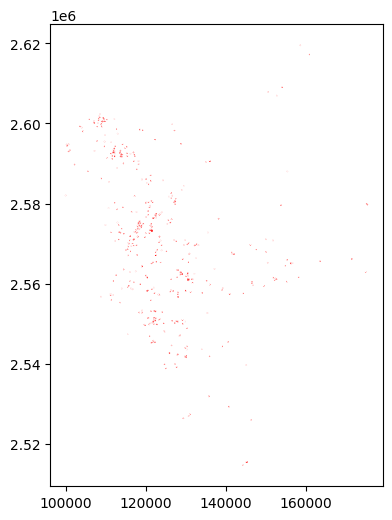

In [2]:
import geopandas as gpd

# === 1. 读取原始 AOI ===
aoi_path = "广州市小区AOI2/广州市小区AOI2.geojson"
aoi_gdf = gpd.read_file(aoi_path)

# === 2. 投影为 UTM Zone 50N，单位为“米”，才能准确计算面积 ===
aoi_gdf_utm = aoi_gdf.to_crs(epsg=32650)

# === 3. 计算面积（单位：平方米） ===
aoi_gdf_utm["area_m2"] = aoi_gdf_utm.geometry.area

# === 4. 过滤出小于 200 m² 的 AOI 并打印数量 ===
small_aoi = aoi_gdf_utm[aoi_gdf_utm["area_m2"] < 400]
large_aoi = aoi_gdf_utm[aoi_gdf_utm["area_m2"] >= 400]

print(f"✅ 总共 AOI 数量：{len(aoi_gdf_utm)}")
print(f"⚠️ 面积 < 400 m² 的 AOI 数量：{len(small_aoi)}")
print(f"✅ 保留面积 ≥ 400 m² 的 AOI 数量：{len(large_aoi)}")

# === 5. 可视化小 AOI 分布（可选）
if not small_aoi.empty:
    small_aoi.plot(figsize=(6, 6), edgecolor='red', facecolor='none')


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === 1. 读取并预处理数据 ===
aoi_path = "广州市小区AOI2/广州市小区AOI2.geojson"
aoi_gdf = gpd.read_file(aoi_path).to_crs(epsg=32650)
aoi_gdf["area_m2"] = aoi_gdf.geometry.area
large_aoi = aoi_gdf[aoi_gdf["area_m2"] >= 400].copy()

# === 2. 面积分布分析 ===
plt.figure(figsize=(12, 6))

# 直方图（对数坐标更清晰）
plt.subplot(1, 2, 1)
bins = np.logspace(np.log10(400), np.log10(large_aoi["area_m2"].max()), 50)
plt.hist(large_aoi["area_m2"], bins=bins, edgecolor='k', alpha=0.7)
plt.xscale('log')
plt.xlabel('面积 (m², 对数坐标)')
plt.ylabel('频数')
plt.title('AOI面积分布（对数坐标）')
plt.grid(True, which="both", ls="--")

# 箱线图
plt.subplot(1, 2, 2)
plt.boxplot(large_aoi["area_m2"], vert=False, patch_artist=True)
plt.xscale('log')
plt.xlabel('面积 (m², 对数坐标)')
plt.title('面积统计分布')
plt.tight_layout()
plt.show()

# === 3. 面积分位数统计 ===
print("\n=== 面积分位数统计 ===")
print(large_aoi["area_m2"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

# === 4. 分层抽样策略 ===
def stratified_sample(df, n_samples=2000):
    # 根据面积分为5个层级
    df['strata'] = pd.qcut(df['area_m2'], q=5, labels=False)
    
    # 每层按比例抽样
    samples = []
    for stratum in range(5):
        stratum_df = df[df['strata'] == stratum]
        sample_size = int(n_samples * len(stratum_df) / len(df))
        samples.append(stratum_df.sample(n=sample_size, random_state=42))
    
    return pd.concat(samples).sample(frac=1, random_state=42)  # 打乱顺序

# === 5. 执行抽样 ===
if len(large_aoi) >= 2000:
    sampled_aoi = stratified_sample(large_aoi, 2000)
    print(f"\n✅ 成功抽取2000个样本（分层抽样）")
    
    # 保存结果
    sampled_aoi.to_file("selected_aoi_samples.geojson", driver='GeoJSON')
    
    # 验证抽样分布
    plt.figure(figsize=(8, 4))
    plt.hist(sampled_aoi["area_m2"], bins=bins, edgecolor='k', alpha=0.7)
    plt.xscale('log')
    plt.title('抽样结果的面积分布')
    plt.show()
else:
    print(f"\n⚠️ 可用AOI数量不足（{len(large_aoi)}个），请降低面积阈值")

In [2]:
import geopandas as gpd
import rasterio
import rasterio.plot
from rasterio.mask import mask
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
from PIL import Image

# === 路径设置 ===
aoi_path = "广州市小区AOI2/广州市小区AOI2.geojson"            # 输入 AOI GeoJSON（WGS84）
raster_path = "20250607广州/广州市1m_utm50.tif"       # 输入遥感影像（EPSG:32650）
output_dir = "aoi_patches_filtered_png_origin"   # 输出目录
os.makedirs(output_dir, exist_ok=True)

# === 图像保存函数：白色背景 ===
def save_png_from_array(out_image, output_path):
    if out_image.shape[0] == 1:
        img = out_image[0]
        # 将背景设为白色
        img_norm = ((img - img.min()) / (img.ptp() + 1e-5) * 255).astype(np.uint8)
        img_norm[img == 0] = 255  # 背景设为白
        Image.fromarray(img_norm, mode='L').save(output_path)
    
    elif out_image.shape[0] >= 3:
        rgb = np.transpose(out_image[:3], (1, 2, 0))
        # 归一化并设置背景为白色
        rgb_norm = ((rgb - rgb.min()) / (rgb.ptp() + 1e-5) * 255).astype(np.uint8)
        mask = np.all(rgb == 0, axis=-1, keepdims=True)
        rgb_norm = np.where(mask, 255, rgb_norm)
        Image.fromarray(rgb_norm, mode='RGB').save(output_path)
    else:
        raise ValueError("图像波段数不支持保存为 PNG")

# === 1. 读取 AOI 并投影为 UTM 50N ===
aoi_gdf = gpd.read_file(aoi_path).to_crs(epsg=32650)

# === 2. 计算面积并过滤小于 1000 平方米的 AOI ===
aoi_gdf["area_m2"] = aoi_gdf.geometry.area
aoi_filtered = aoi_gdf[aoi_gdf["area_m2"] >= 1000].copy()
print(f"✅ 原始 AOI 数量：{len(aoi_gdf)}")
print(f"✅ 筛选后 AOI（面积 ≥ 1000 m²）数量：{len(aoi_filtered)}")

# === 3. 为每个 AOI 添加 20 米缓冲区 ===
aoi_filtered["geometry"] = aoi_filtered.geometry.buffer(20)

# === 4. 处理所有符合条件的AOI ===
with rasterio.open(raster_path) as src:
    meta = src.meta
    failed_indices = []  # 记录失败案例

    # 使用tqdm显示整体进度
    for idx, row in tqdm(aoi_filtered.iterrows(), total=len(aoi_filtered), desc="处理AOI"):
        geom = [mapping(row["geometry"])]

        try:
            # === 裁剪遥感图像 ===
            # 添加nodata处理，防止黑色背景
            out_image, out_transform = mask(
                src, 
                geom, 
                crop=True, 
                nodata=src.nodata if src.nodata is not None else 0,
                all_touched=False
            )
            
            # === 保存为PNG ===
            png_path = os.path.join(output_dir, f"aoi_{idx}.png")
            save_png_from_array(out_image, png_path)

            # === 保存属性信息 ===
            props = row.drop("geometry").to_dict()
            props_serializable = {
                k: (
                    str(v) if isinstance(v, pd.Timestamp)
                    else int(v) if isinstance(v, (np.integer,))
                    else float(v) if isinstance(v, (np.floating,))
                    else str(v) if isinstance(v, (np.datetime64,))
                    else v
                )
                for k, v in props.items()
            }
            # 添加图像元数据
            props_serializable.update({
                "image_metadata": {
                    "shape": out_image.shape,
                    "transform": list(out_transform),
                    "crs": src.crs.to_string()
                }
            })
            
            json_path = os.path.join(output_dir, f"aoi_{idx}.json")
            with open(json_path, 'w', encoding='utf-8') as f:
                json.dump(props_serializable, f, ensure_ascii=False, indent=2)

        except Exception as e:
            failed_indices.append(idx)
            print(f"[⚠️] AOI {idx} 处理失败：{str(e)}")
            continue

# === 5. 输出统计信息 ===
print("\n=== 处理结果统计 ===")
print(f"成功处理: {len(aoi_filtered) - len(failed_indices)}个")
print(f"失败数量: {len(failed_indices)}个")
if failed_indices:
    print(f"失败索引: {failed_indices}")

✅ 原始 AOI 数量：8916
✅ 筛选后 AOI（面积 ≥ 1000 m²）数量：7789


处理AOI:  38%|█████████████████████████▉                                           | 2921/7789 [02:44<02:01, 39.99it/s]

[⚠️] AOI 3359 处理失败：Input shapes do not overlap raster.


处理AOI: 100%|█████████████████████████████████████████████████████████████████████| 7789/7789 [06:12<00:00, 20.89it/s]



=== 处理结果统计 ===
成功处理: 7788个
失败数量: 1个
失败索引: [3359]


In [34]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping
import numpy as np
from PIL import Image, ImageEnhance
from tqdm import tqdm

# === 路径设置 ===
aoi_path = "广州市小区AOI2/广州市小区AOI2.geojson"  # 请修改为你自己的路径
raster_path = "20250607广州/广州市1m_utm50.tif"      # 请修改为你自己的路径
output_dir = "aoi_patches_preview"
os.makedirs(output_dir, exist_ok=True)


# === 读取 AOI 并投影为 UTM ===
aoi_gdf = gpd.read_file(aoi_path).to_crs(epsg=32650)
aoi_gdf["area_m2"] = aoi_gdf.geometry.area
aoi_filtered = aoi_gdf[aoi_gdf["area_m2"] >= 1000].copy()
aoi_filtered["geometry"] = aoi_filtered.geometry.buffer(20)

# === 裁剪前 10 个 AOI 并保存为 GeoTIFF ===
with rasterio.open(raster_path) as src:
    for idx, row in tqdm(aoi_filtered.head(10).iterrows(), total=10, desc="裁剪前10个AOI"):
        try:
            geom = [mapping(row["geometry"])]
            out_image, out_transform = mask(
                src, geom, crop=True,
                nodata=src.nodata if src.nodata is not None else 0
            )

            # 更新元数据
            out_meta = src.meta.copy()
            out_meta.update({
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform,
                "driver": "GTiff"
            })

            out_path = os.path.join(output_dir, f"aoi_{idx}.tif")
            with rasterio.open(out_path, "w", **out_meta) as dst:
                dst.write(out_image)

        except Exception as e:
            print(f"[❌] AOI {idx} 裁剪失败: {e}")

裁剪前10个AOI: 100%|███████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.87it/s]


In [1]:
import geopandas as gpd
import rasterio
import rasterio.plot
from rasterio.mask import mask
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
from PIL import Image

# === 路径设置 ===
aoi_path = "广州市小区AOI2/广州市小区AOI2.geojson"            # 输入 AOI GeoJSON（WGS84）
raster_path = "20250607广州/广州市1m_utm50.tif"       # 输入遥感影像（EPSG:32650）
output_dir = "aoi_patches_filtered_png"   # 输出目录
os.makedirs(output_dir, exist_ok=True)

# === 图像保存函数：白色背景 ===
import cv2

# === 图像增强函数：提升对比度 ===
def enhance_contrast(image_np):
    if len(image_np.shape) == 2:  # 灰度图
        return cv2.equalizeHist(image_np)
    elif len(image_np.shape) == 3 and image_np.shape[2] == 3:  # RGB图像
        lab = cv2.cvtColor(image_np, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        enhanced_lab = cv2.merge((cl, a, b))
        enhanced_rgb = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2RGB)
        return enhanced_rgb
    else:
        return image_np

# === 保存为高清PNG的主函数 ===
def save_png_from_array(out_image, output_path):
    if out_image.shape[0] == 1:
        img = out_image[0]
        img_norm = ((img - img.min()) / (img.ptp() + 1e-5) * 255).astype(np.uint8)
        img_norm[img == 0] = 255  # 背景设白

        # 对比度增强
        img_enhanced = enhance_contrast(img_norm)

        # 保存为高清灰度图
        Image.fromarray(img_enhanced, mode='L').save(output_path, dpi=(300, 300))

    elif out_image.shape[0] >= 3:
        rgb = np.transpose(out_image[:3], (1, 2, 0))
        rgb_norm = ((rgb - rgb.min()) / (rgb.ptp() + 1e-5) * 255).astype(np.uint8)

        # 设置背景白色
        mask = np.all(rgb == 0, axis=-1, keepdims=True)
        rgb_norm = np.where(mask, 255, rgb_norm)

        # 对比度增强
        rgb_enhanced = enhance_contrast(rgb_norm)

        # 保存为高清彩色图
        Image.fromarray(rgb_enhanced, mode='RGB').save(output_path, dpi=(300, 300))

    else:
        raise ValueError("图像波段数不支持保存为 PNG")


# === 1. 读取 AOI 并投影为 UTM 50N ===
aoi_gdf = gpd.read_file(aoi_path).to_crs(epsg=32650)

# === 2. 计算面积并过滤小于 1000 平方米的 AOI ===
aoi_gdf["area_m2"] = aoi_gdf.geometry.area
aoi_filtered = aoi_gdf[aoi_gdf["area_m2"] >= 1000].copy()
print(f"✅ 原始 AOI 数量：{len(aoi_gdf)}")
print(f"✅ 筛选后 AOI（面积 ≥ 1000 m²）数量：{len(aoi_filtered)}")

# === 3. 为每个 AOI 添加 20 米缓冲区 ===
aoi_filtered["geometry"] = aoi_filtered.geometry.buffer(20)

# === 4. 处理所有符合条件的AOI ===
with rasterio.open(raster_path) as src:
    meta = src.meta
    failed_indices = []  # 记录失败案例

    # 使用tqdm显示整体进度
    for idx, row in tqdm(aoi_filtered.iterrows(), total=len(aoi_filtered), desc="处理AOI"):
        geom = [mapping(row["geometry"])]

        try:
            # === 裁剪遥感图像 ===
            # 添加nodata处理，防止黑色背景
            out_image, out_transform = mask(
                src, 
                geom, 
                crop=True, 
                nodata=src.nodata if src.nodata is not None else 0,
                all_touched=False
            )
            
            # === 保存为PNG ===
            png_path = os.path.join(output_dir, f"aoi_{idx}.png")
            save_png_from_array(out_image, png_path)

            # === 保存属性信息 ===
            props = row.drop("geometry").to_dict()
            props_serializable = {
                k: (
                    str(v) if isinstance(v, pd.Timestamp)
                    else int(v) if isinstance(v, (np.integer,))
                    else float(v) if isinstance(v, (np.floating,))
                    else str(v) if isinstance(v, (np.datetime64,))
                    else v
                )
                for k, v in props.items()
            }
            # 添加图像元数据
            props_serializable.update({
                "image_metadata": {
                    "shape": out_image.shape,
                    "transform": list(out_transform),
                    "crs": src.crs.to_string()
                }
            })
            
            json_path = os.path.join(output_dir, f"aoi_{idx}.json")
            with open(json_path, 'w', encoding='utf-8') as f:
                json.dump(props_serializable, f, ensure_ascii=False, indent=2)

        except Exception as e:
            failed_indices.append(idx)
            print(f"[⚠️] AOI {idx} 处理失败：{str(e)}")
            continue

# === 5. 输出统计信息 ===
print("\n=== 处理结果统计 ===")
print(f"成功处理: {len(aoi_filtered) - len(failed_indices)}个")
print(f"失败数量: {len(failed_indices)}个")
if failed_indices:
    print(f"失败索引: {failed_indices}")

✅ 原始 AOI 数量：8916
✅ 筛选后 AOI（面积 ≥ 1000 m²）数量：7789


处理AOI:  38%|█████████████████████████▉                                           | 2923/7789 [04:12<03:07, 25.99it/s]

[⚠️] AOI 3359 处理失败：Input shapes do not overlap raster.


处理AOI:  78%|█████████████████████████████████████████████████████▌               | 6043/7789 [06:08<01:46, 16.40it/s]


KeyboardInterrupt: 

In [27]:
import os
import json
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms

class AOIMultimodalDataset(Dataset):
    def __init__(self, root_dir, transform=None, attr_keys=None, normalize_numeric=True):
        """
        root_dir: 存放 .png 和 .json 文件的路径
        transform: 图像预处理（如 ToTensor, Resize 等）
        attr_keys: 如果只选择部分字段作为输入（如 ['type', 'area']）
        normalize_numeric: 是否将数字字段标准化（min-max）
        """
        self.root_dir = root_dir
        self.transform = transform
        self.attr_keys = attr_keys
        self.normalize_numeric = normalize_numeric

        # 获取样本ID（即去掉扩展名）
        self.sample_ids = sorted([
            f[:-4] for f in os.listdir(root_dir) if f.endswith(".png")
        ])

        # 初始化属性统计（用于归一化）
        self.attr_min = {}
        self.attr_max = {}

        if normalize_numeric:
            self._calc_attr_range()

    def _calc_attr_range(self):
        # 扫一遍所有 json 文件统计每个字段的 min/max
        for sid in self.sample_ids:
            with open(os.path.join(self.root_dir, f"{sid}.json"), 'r', encoding='utf-8') as f:
                data = json.load(f)
            for k, v in data.items():
                try:
                    v = float(v)
                    self.attr_min[k] = min(self.attr_min.get(k, v), v)
                    self.attr_max[k] = max(self.attr_max.get(k, v), v)
                except:
                    continue  # 非数值类型忽略

    def __len__(self):
        return len(self.sample_ids)

    def __getitem__(self, idx):
        sid = self.sample_ids[idx]
        img_path = os.path.join(self.root_dir, f"{sid}.png")
        json_path = os.path.join(self.root_dir, f"{sid}.json")

        # 加载图像
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # 加载属性
        with open(json_path, 'r', encoding='utf-8') as f:
            attrs = json.load(f)

        # 过滤字段（如只保留部分）
        if self.attr_keys:
            attrs = {k: attrs.get(k, None) for k in self.attr_keys}

        # 数值归一化
        attr_tensor = []
        for k, v in attrs.items():
            try:
                v = float(v)
                if self.normalize_numeric and k in self.attr_min and self.attr_max[k] != self.attr_min[k]:
                    v = (v - self.attr_min[k]) / (self.attr_max[k] - self.attr_min[k])
                attr_tensor.append(v)
            except:
                pass  # 非数值字段忽略，或可扩展为编码字符串
        attr_tensor = torch.tensor(attr_tensor, dtype=torch.float)

        return {
            "id": sid,
            "image": image,
            "attr": attr_tensor
        }
# 图像预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 加载数据
dataset = AOIMultimodalDataset("aoi_patches_filtered_png", transform=transform)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

# 训练中使用
for batch in loader:
    images = batch['image']     # Tensor [B, 3, 224, 224]
    attrs = batch['attr']       # Tensor [B, D]（属性向量）
    ids = batch['id']           # List of AOI IDs
    # your_model(images, attrs)


In [28]:
loader

In [6]:
import os
import json
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.cluster import KMeans
from shapely.geometry import Point
import geopandas as gpd

# === 路径 ===
input_dir = "aoi_patches_filtered_png"
output_dir = "aoi_patches_train_5681"
os.makedirs(output_dir, exist_ok=True)

# === 读取所有 JSON 元数据 ===
json_files = [f for f in os.listdir(input_dir) if f.endswith(".json")]
records = []

for f in tqdm(json_files, desc="读取 JSON"):
    json_path = os.path.join(input_dir, f)
    with open(json_path, 'r', encoding='utf-8') as jf:
        data = json.load(jf)
        try:
            area = data.get("area_m2", 0)
            transform = data["image_metadata"]["transform"]
            # 提取左上角坐标
            x_min = transform[2]
            y_max = transform[5]
            records.append({
                "json_file": f,
                "png_file": f.replace(".json", ".png"),
                "area": area,
                "x": x_min,
                "y": y_max
            })
        except:
            continue

df = pd.DataFrame(records)

# === 过滤面积 > 400 ===
df_filtered = df[df["area"] > 400].copy()
print(f"✅ 面积 > 400 的AOI数量: {len(df_filtered)}")

# === 地理聚类（控制空间分布均衡） ===
coords = df_filtered[["x", "y"]].values
kmeans = KMeans(n_clusters=20, random_state=42).fit(coords)
df_filtered["geo_cluster"] = kmeans.labels_

# === 面积分段（等频分箱） ===
df_filtered["area_bin"] = pd.qcut(df_filtered["area"], q=10, labels=False, duplicates='drop')

# === 分层抽样（按 geo_cluster 和 area_bin） ===
target_n = 10000
grouped = df_filtered.groupby(["geo_cluster", "area_bin"])
samples = []

# 每组应抽样数量
n_per_group = target_n // grouped.ngroups
remainder = target_n % grouped.ngroups

for (name, group) in grouped:
    n = min(n_per_group + (1 if remainder > 0 else 0), len(group))
    remainder -= 1
    sampled_group = group.sample(n=n, random_state=42)
    samples.append(sampled_group)

df_sampled = pd.concat(samples).reset_index(drop=True)
print(f"✅ 实际采样数量: {len(df_sampled)}")

# === 拷贝文件到新目录 ===
for _, row in tqdm(df_sampled.iterrows(), total=len(df_sampled), desc="复制文件"):
    src_json = os.path.join(input_dir, row["json_file"])
    src_png = os.path.join(input_dir, row["png_file"])
    dst_json = os.path.join(output_dir, row["json_file"])
    dst_png = os.path.join(output_dir, row["png_file"])
    shutil.copy2(src_json, dst_json)
    shutil.copy2(src_png, dst_png)

print(f"\n🎉 成功保存 2000 个样本到：{output_dir}")


读取 JSON: 100%|█████████████████████████████████████████████████████████████████| 7788/7788 [00:00<00:00, 8802.27it/s]


✅ 面积 > 400 的AOI数量: 7788
✅ 实际采样数量: 5681


复制文件: 100%|███████████████████████████████████████████████████████████████████| 5681/5681 [00:13<00:00, 411.83it/s]


🎉 成功保存 2000 个样本到：aoi_patches_train_5681


In [21]:
import os
import re
import json
from pathlib import Path
from openpyxl import Workbook
from openpyxl.styles import Font

# === 路径设置 ===
img_dir = "5681广州标注/aoi_patches_train_5681"
xlsx_path = os.path.join(os.path.dirname(img_dir), "labels_with_links.xlsx")  # Excel 放在上级目录

# 提取 index 用于排序
def extract_index(filename):
    match = re.search(r"aoi_(\d+)\.png", filename)
    return int(match.group(1)) if match else -1

# 获取所有 PNG 文件并排序
png_files = [f for f in os.listdir(img_dir) if f.endswith(".png")]
png_files = sorted(png_files, key=extract_index)

# 构建数据
rows = []
for f in png_files:
    idx = extract_index(f)
    json_path = os.path.join(img_dir, f"aoi_{idx}.json")

    name, address, lon, lat = "", "", "", ""
    if os.path.exists(json_path):
        try:
            with open(json_path, 'r', encoding='utf-8') as jf:
                data = json.load(jf)
                name = data.get("name", "")
                address = data.get("address", "")
                lon = str(data.get("WGS84_lon", ""))
                lat = str(data.get("WGS84_lat", ""))
        except Exception as e:
            print(f"[⚠️] JSON读取失败 {json_path}：{str(e)}")

    # ✅ 相对路径：确保是如 aoi_patches_train_5681/aoi_5.png 的形式
    rel_image_path = Path(os.path.join(img_dir, f)).relative_to(os.path.dirname(xlsx_path)).as_posix()

    rows.append({
        "filename": f,
        "image_path": rel_image_path,
        "name": name,
        "address": address,
        "WGS84_lon": lon,
        "WGS84_lat": lat,
        "google_url": f"https://www.google.com/maps/@{lat},{lon},19z/data=!3m1!1e3" if lon and lat else "",
        "label": ""
    })

# 写入 Excel，带超链接
wb = Workbook()
ws = wb.active
ws.title = "AOI 标签数据"

headers = ["filename", "image", "name", "address", "WGS84_lon", "WGS84_lat", "Google遥感", "label"]
ws.append(headers)

for i, row in enumerate(rows, start=2):
    ws.cell(row=i, column=1, value=row["filename"])

    # 图像超链接
    image_cell = ws.cell(row=i, column=2, value="查看图像")
    image_cell.hyperlink = row["image_path"]
    image_cell.font = Font(color="0000FF", underline="single")

    ws.cell(row=i, column=3, value=row["name"])
    ws.cell(row=i, column=4, value=row["address"])
    ws.cell(row=i, column=5, value=row["WGS84_lon"])
    ws.cell(row=i, column=6, value=row["WGS84_lat"])

    gmap_cell = ws.cell(row=i, column=7, value="Google遥感")
    if row["google_url"]:
        gmap_cell.hyperlink = row["google_url"]
        gmap_cell.font = Font(color="0000FF", underline="single")

    ws.cell(row=i, column=8, value=row["label"])

wb.save(xlsx_path)
print(f"✅ Excel 已保存：{xlsx_path}")


✅ Excel 已保存：5681广州标注\labels_with_links.xlsx


In [7]:
import os
import pandas as pd
import re

# 图像文件夹路径
img_dir = "aoi_patches_train_5681"

# 提取数字排序
def extract_index(filename):
    match = re.search(r"aoi_(\d+)\.png", filename)
    return int(match.group(1)) if match else -1

# 获取并排序 PNG 文件
png_files = [f for f in os.listdir(img_dir) if f.endswith(".png")]
png_files = sorted(png_files, key=extract_index)

# 构建 DataFrame
df = pd.DataFrame({
    "filename": png_files,
    "label": [""] * len(png_files)
})

# 保存 CSV
df.to_csv(os.path.join(img_dir, "labels.csv"), index=False)
print(f"✅ 按编号排序的 labels.csv 已保存到 {img_dir}/labels.csv")


✅ 按编号排序的 labels.csv 已保存到 aoi_patches_train_5681/labels.csv


In [8]:
import os
import pandas as pd
import re

# 图像文件夹路径（与CSV在同一父目录下）
img_dir = "aoi_patches_train_5681"

# 提取数字排序
def extract_index(filename):
    match = re.search(r"aoi_(\d+)\.png", filename)
    return int(match.group(1)) if match else -1

# 获取并排序 PNG 文件
png_files = [f for f in os.listdir(img_dir) if f.endswith(".png")]
png_files = sorted(png_files, key=extract_index)

# 构建带相对路径超链接的 DataFrame
df = pd.DataFrame({
    "filename": png_files,
    "hyperlink": [f'=HYPERLINK("{img_dir}/{f}", "{f}")' for f in png_files],
    "label": [""] * len(png_files)
})

# 保存为 CSV（注意：路径需在 Excel 打开时保持目录结构）
csv_path = os.path.join(img_dir, "labels_with_links.csv")
df.to_csv(csv_path, index=False)

print(f"✅ 使用相对路径的 labels_with_links.csv 已保存到 {csv_path}")


✅ 使用相对路径的 labels_with_links.csv 已保存到 aoi_patches_train_5681\labels_with_links.csv


In [10]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 143.4/250.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 2.6 MB/s eta 0:00:00


In [9]:
import os
import pandas as pd
import re
import json

# === 路径设置 ===
img_dir = "aoi_patches_train_5681"
csv_path = os.path.join(img_dir, "labels_with_links.csv")

# 提取 index 用于排序
def extract_index(filename):
    match = re.search(r"aoi_(\d+)\.png", filename)
    return int(match.group(1)) if match else -1

# 获取所有 PNG 文件并排序
png_files = [f for f in os.listdir(img_dir) if f.endswith(".png")]
png_files = sorted(png_files, key=extract_index)

# 构建 DataFrame 内容
rows = []

for f in png_files:
    idx = extract_index(f)
    json_filename = f"aoi_{idx}.json"
    json_path = os.path.join(img_dir, json_filename)

    # 初始化字段
    name = ""
    address = ""
    lon = ""
    lat = ""
    baidu_link = ""

    # 尝试读取 JSON
    if os.path.exists(json_path):
        try:
            with open(json_path, 'r', encoding='utf-8') as jf:
                data = json.load(jf)
                name = data.get("name", "")
                address = data.get("address", "")
                lon = data.get("WGS84_lon", "")
                lat = data.get("WGS84_lat", "")

                # 构造百度地图影像链接
                if lon != "" and lat != "":
                    baidu_link = f'=HYPERLINK("https://api.map.baidu.com/marker?location={lat},{lon}&title=AOI&content=查看小区影像&output=html&coord_type=wgs84&zoom=20", "查看影像")'
        except Exception as e:
            print(f"[⚠️] JSON读取失败：{json_path} | 错误：{str(e)}")

    # 添加行记录
    rows.append({
        "filename": f,
        "hyperlink": f'=HYPERLINK("{img_dir}/{f}", "{f}")',
        "name": name,
        "address": address,
        "WGS84_lon": lon,
        "WGS84_lat": lat,
        "baidu_map": baidu_link,
        "label": ""  # 预留标注
    })

# 创建 DataFrame 并保存
df = pd.DataFrame(rows)
df.to_csv(csv_path, index=False, encoding='utf-8-sig')

print(f"✅ 已生成 CSV 文件，保存路径：{csv_path}")


✅ 已生成 CSV 文件，保存路径：aoi_patches_train_5681\labels_with_links.csv


In [19]:
!pip install coordtransform

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for coordtransform: filename=coordTransform-0.1.3-py3-none-any.whl size=2025 sha256=98565f82ca002f9ee9423503de6c3ca6b006c99d9470a3ad2fdade1c155dc475
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\22\30\95\8586884dc96026fab29b6d543b3dbb4593290ed81e4ac0e5c5
Successfully built coordtransform


In [13]:
import os
import re
import json
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import Font

# === 路径设置 ===
img_dir = "5681广州标注/aoi_patches_train_5681"
xlsx_path = os.path.join(img_dir, "labels_with_links.xlsx")

# 提取 index 用于排序
def extract_index(filename):
    match = re.search(r"aoi_(\d+)\.png", filename)
    return int(match.group(1)) if match else -1

# 获取所有 PNG 文件并排序
png_files = [f for f in os.listdir(img_dir) if f.endswith(".png")]
png_files = sorted(png_files, key=extract_index)

# 构建数据
rows = []
for f in png_files:
    idx = extract_index(f)
    json_path = os.path.join(img_dir, f"aoi_{idx}.json")

    name, address, lon, lat = "", "", "", ""
    if os.path.exists(json_path):
        try:
            with open(json_path, 'r', encoding='utf-8') as jf:
                data = json.load(jf)
                name = data.get("name", "")
                address = data.get("address", "")
                lon = str(data.get("WGS84_lon", ""))
                lat = str(data.get("WGS84_lat", ""))
        except Exception as e:
            print(f"[⚠️] JSON读取失败 {json_path}：{str(e)}")

    rows.append({
        "filename": f,
        "image_path": os.path.join(img_dir, f),
        "name": name,
        "address": address,
        "WGS84_lon": lon,
        "WGS84_lat": lat,
        "google_url": f"https://www.google.com/maps/@{lat},{lon},19z/data=!3m1!1e3" if lon and lat else "",
        "label": ""
    })

# 写入 Excel 带超链接
wb = Workbook()
ws = wb.active
ws.title = "AOI 标签数据"

headers = ["filename", "image", "name", "address", "WGS84_lon", "WGS84_lat", "Google遥感", "label"]
ws.append(headers)

for i, row in enumerate(rows, start=2):
    ws.cell(row=i, column=1, value=row["filename"])

    image_cell = ws.cell(row=i, column=2, value="查看图像")
    image_cell.hyperlink = row["image_path"]
    image_cell.font = Font(color="0000FF", underline="single")

    ws.cell(row=i, column=3, value=row["name"])
    ws.cell(row=i, column=4, value=row["address"])
    ws.cell(row=i, column=5, value=row["WGS84_lon"])
    ws.cell(row=i, column=6, value=row["WGS84_lat"])

    gmap_cell = ws.cell(row=i, column=7, value="Google遥感")
    if row["google_url"]:
        gmap_cell.hyperlink = row["google_url"]
        gmap_cell.font = Font(color="0000FF", underline="single")

    ws.cell(row=i, column=8, value=row["label"])

wb.save(xlsx_path)
xlsx_path


'5681广州标注/aoi_patches_train_5681\\labels_with_links.xlsx'

'aoi_patches_train_2000\\labels_with_links.xlsx'

In [11]:
import os
import re
import json
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import Font

# === 路径设置 ===
img_dir = "aoi_patches_train_5681"
xlsx_path = os.path.join(img_dir, "labels_with_links.xlsx")

# OneDrive 图像前缀（注意这里是 “:i:/g” 而不是 “:f:/g”）
onedrive_prefix = "https://hkustgz-my.sharepoint.com/:i:/g/personal/mzhao886_connect_hkust-gz_edu_cn/ErDQQ3D4FslLiJSVtHqKPfUBfoH6acY8omCbXwcPL0X1rA"

# 提取 index 用于排序
def extract_index(filename):
    match = re.search(r"aoi_(\d+)\.png", filename)
    return int(match.group(1)) if match else -1

# 获取 PNG 文件并排序
png_files = sorted([f for f in os.listdir(img_dir) if f.endswith(".png")], key=extract_index)

# 构建数据
rows = []
for f in png_files:
    idx = extract_index(f)
    json_path = os.path.join(img_dir, f"aoi_{idx}.json")

    name, address, lon, lat = "", "", "", ""
    if os.path.exists(json_path):
        try:
            with open(json_path, 'r', encoding='utf-8') as jf:
                data = json.load(jf)
                name = data.get("name", "")
                address = data.get("address", "")
                lon = str(data.get("WGS84_lon", ""))
                lat = str(data.get("WGS84_lat", ""))
        except Exception as e:
            print(f"[⚠️] JSON读取失败 {json_path}：{str(e)}")

    # 构造 OneDrive 超链接路径（注意要加文件名后缀）
    image_url = f"{onedrive_prefix}/aoi_{idx}.png"

    rows.append({
        "filename": f,
        "image_url": image_url,
        "name": name,
        "address": address,
        "WGS84_lon": lon,
        "WGS84_lat": lat,
        "google_url": f"https://www.google.com/maps/@{lat},{lon},19z/data=!3m1!1e3" if lon and lat else "",
        "label": ""
    })

# 写入 Excel 带超链接
wb = Workbook()
ws = wb.active
ws.title = "AOI 标签数据"

headers = ["filename", "image", "name", "address", "WGS84_lon", "WGS84_lat", "Google遥感", "label"]
ws.append(headers)

for i, row in enumerate(rows, start=2):
    ws.cell(row=i, column=1, value=row["filename"])

    # 图像 OneDrive 超链接
    image_cell = ws.cell(row=i, column=2, value="查看图像")
    image_cell.hyperlink = row["image_url"]
    image_cell.font = Font(color="0000FF", underline="single")

    ws.cell(row=i, column=3, value=row["name"])
    ws.cell(row=i, column=4, value=row["address"])
    ws.cell(row=i, column=5, value=row["WGS84_lon"])
    ws.cell(row=i, column=6, value=row["WGS84_lat"])

    gmap_cell = ws.cell(row=i, column=7, value="Google遥感")
    if row["google_url"]:
        gmap_cell.hyperlink = row["google_url"]
        gmap_cell.font = Font(color="0000FF", underline="single")

    ws.cell(row=i, column=8, value=row["label"])

# 保存
wb.save(xlsx_path)
print(f"✅ 已保存 Excel 文件，路径：{xlsx_path}")


✅ 已保存 Excel 文件，路径：aoi_patches_train_5681\labels_with_links.xlsx
